# Laboratorio 1

Instrucciones: Usted va a crear un Jupyter Notebook para el ejercicio siguiente. 
Utilice comentarios para describir lo que hace en cada paso. 
Aproveche los recursos que tiene disponibles en el portal. 
Al finalizar, guarde su notebook y envíelo a franzhaidacher@ufm.edu, 
cc luissuriano@ufm.edu .

0. Lea el archivo de datos proporcionado (FuelSalesDataSample.csv) 
y almacénelo en un DataFrame.

In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt
import numpy as np
 
df = pandas.read_csv("FuelSalesDataSample.csv")
df.head(3)

,Date,Weekday,Hour,SiteID,SiteName,Grade,Pump,ServiceType,VolumeSold,PaymentType,UnitPrice,TotalSale
0,1/1/2017,7,0,6601,Falls Church,REGULAR,1,FULL,7.40,CASH,$2.78,$20.57
1,1/1/2017,7,0,6601,Falls Church,REGULAR,3,FULL,11.03,CASH,$2.78,$30.66
2,1/1/2017,7,0,6601,Falls Church,REGULAR,5,FULL,11.70,CREDIT CARD,$2.78,$32.53


In [2]:
# Eliminar el signo de dolar para leer cantidades como numéricas
df['UnitPrice'] = df['UnitPrice'].replace('[\\$,]', '', regex=True).astype(float)
df['TotalSale'] = df['TotalSale'].replace('[\\$,]', '', regex=True).astype(float)

# Convertir fechas a formato estándar
df['Date'] = pandas.to_datetime(df.Date)

df.head(3)

,Date,Weekday,Hour,SiteID,SiteName,Grade,Pump,ServiceType,VolumeSold,PaymentType,UnitPrice,TotalSale
0,2017-01-01,7,0,6601,Falls Church,REGULAR,1,FULL,7.40,CASH,2.78,20.57
1,2017-01-01,7,0,6601,Falls Church,REGULAR,3,FULL,11.03,CASH,2.78,30.66
2,2017-01-01,7,0,6601,Falls Church,REGULAR,5,FULL,11.70,CREDIT CARD,2.78,32.53


1. Elabore una gráfica de barras comparativa de volúmenes totales por 
estación para determinar cuáles venden más y cuáles venden menos. 
¿Puede elaborar barras apiladas de distinto color por grado de combustible?

In [3]:
# reset_index() permite que ambos campos sean labels
df1 = df.groupby(['SiteID'])[['VolumeSold']].aggregate(np.sum).reset_index().sort_values('VolumeSold')
df1.head(3)

,SiteID,VolumeSold
4,6606,10178.45
31,6653,10726.38
20,6639,13445.40


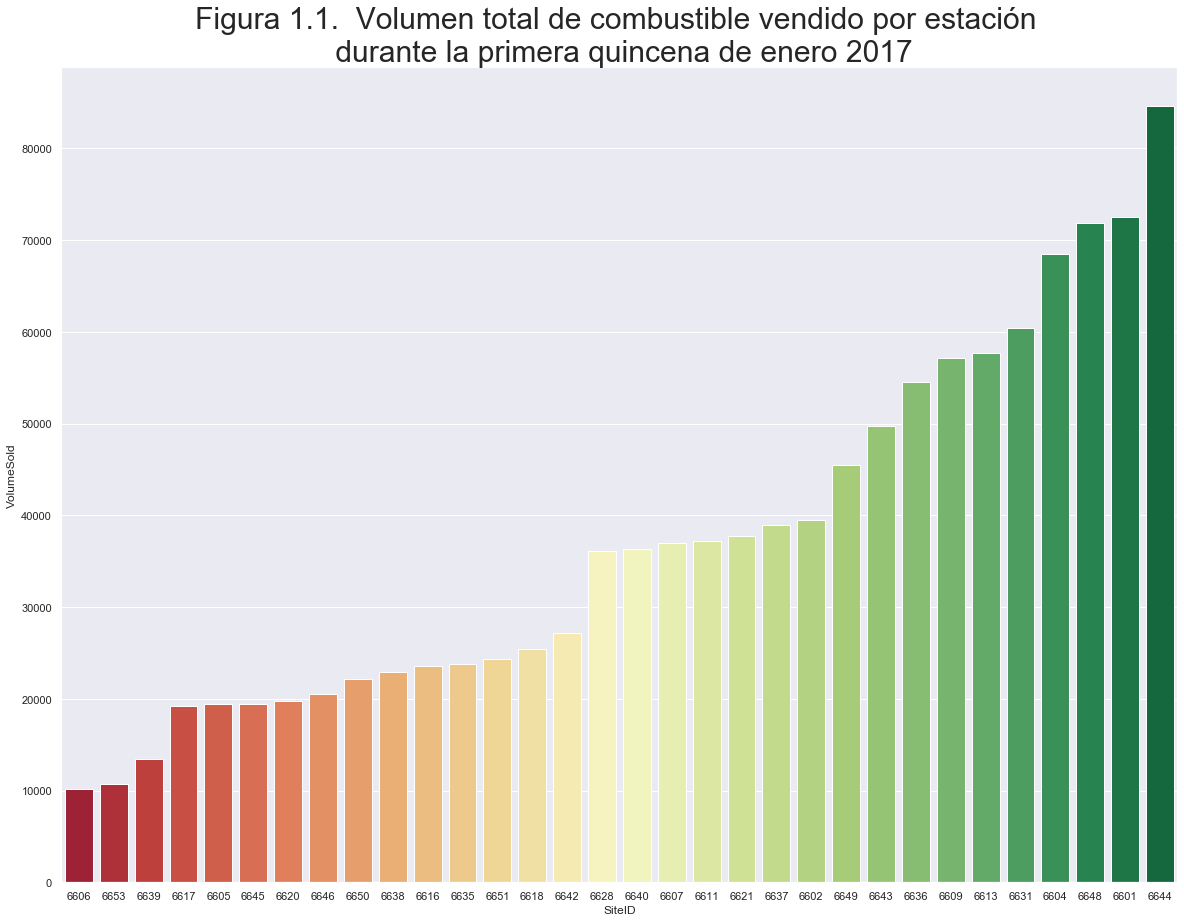

In [4]:
seaborn.set()
plt.subplots(figsize=(20,15))
plt.title('Figura 1.1.  Volumen total de combustible vendido por estación '
          '\n durante la primera quincena de enero 2017', fontsize=30)
seaborn.barplot(x='SiteID', y='VolumeSold', data=df1, order=df1['SiteID'], palette='RdYlGn')

Text(0.5, 1.0, 'Figura 1.2.  Volumen total de combustible vendido por estación \n durante la primera quincena de enero 2017 según grado')

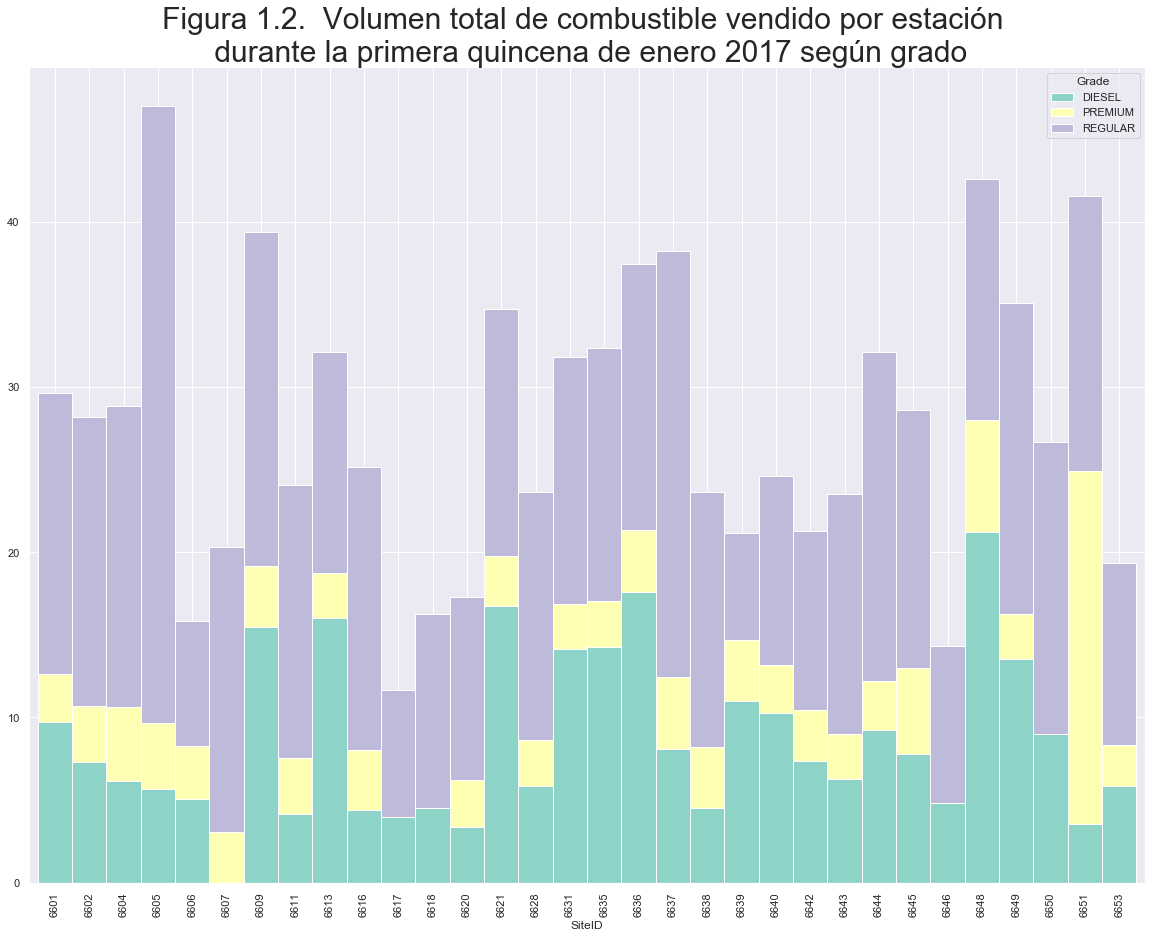

In [5]:
pt = df.pivot_table(index='SiteID', columns='Grade', values='VolumeSold')
seaborn.set(palette='Set3')
pt.plot(kind='bar', stacked=True, figsize=(20,15), width=1)
plt.title('Figura 1.2.  Volumen total de combustible vendido por estación '
          '\n durante la primera quincena de enero 2017 según grado', fontsize=30)


2. Muestre los precios promedio de combustible regular para cada 
estación en una gráfica de barras comparativa.

Text(0.5, 1.0, 'Figura 2.  Precio promedio de combustible grado regular según estación \n durante la primera quincena de enero 2017')

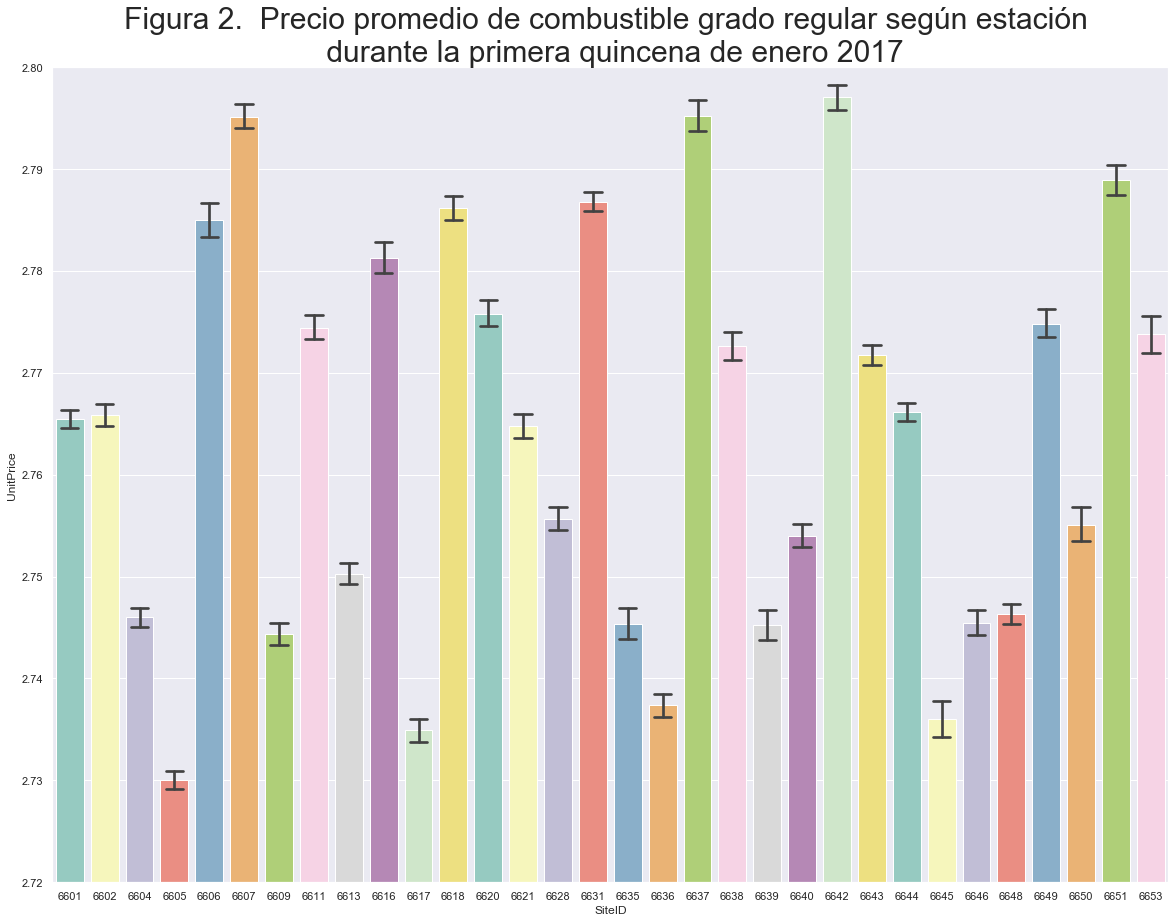

In [6]:
# with error bar
df2 = df.groupby('Grade').get_group('REGULAR')

seaborn.set()
plt.subplots(figsize=(20,15))
plt.ylim(2.72, 2.8)
seaborn.barplot(x='SiteID', y='UnitPrice', data=df2, capsize=0.5, palette='Set3')
plt.title('Figura 2.  Precio promedio de combustible grado regular según estación '
          '\n durante la primera quincena de enero 2017', fontsize=30)


3. Averigüe cómo varían diariamente los precios de combustible regular 
en la estación 6601.

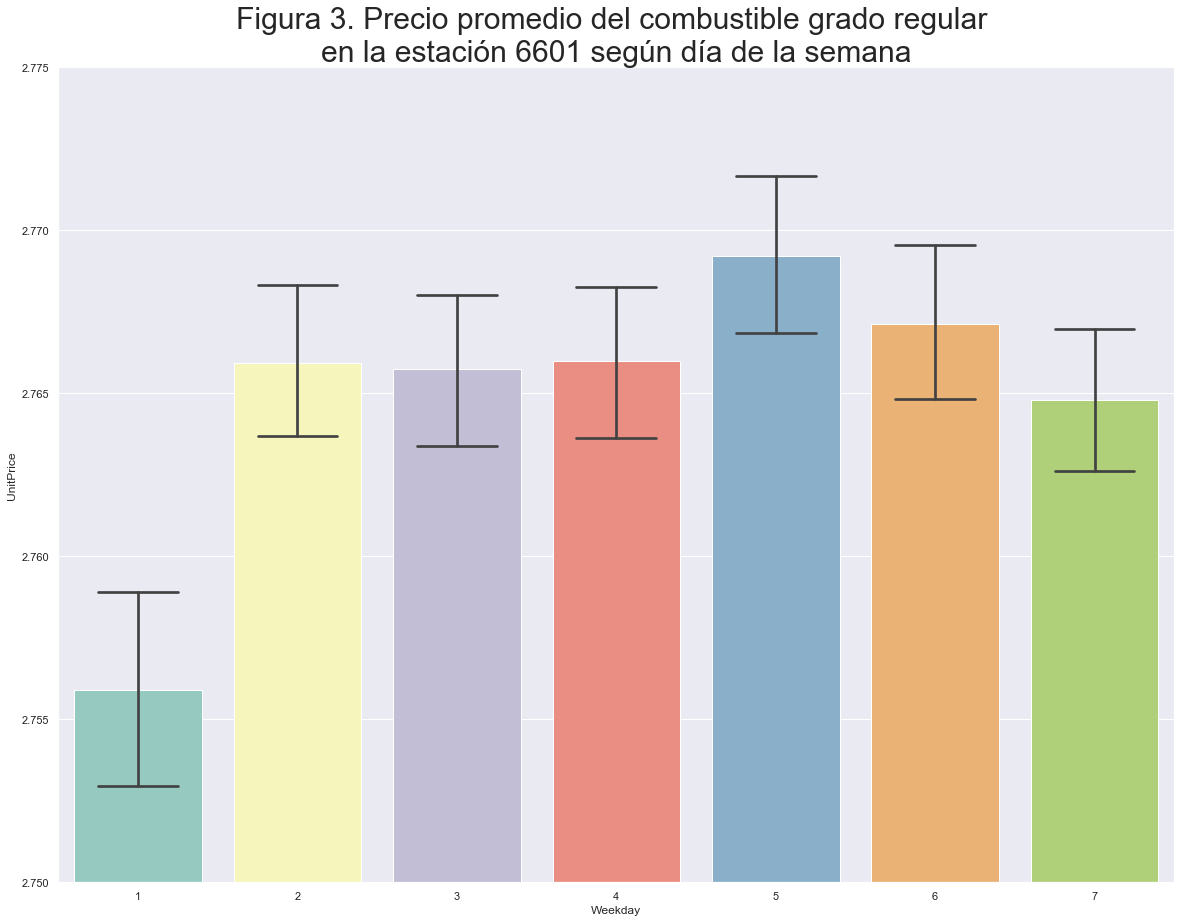

In [7]:
df3 = df.groupby(['SiteID', 'Grade']).get_group((6601, 'REGULAR'))
seaborn.set()
plt.subplots(figsize=(20,15))
plt.ylim(2.75, 2.775)
plt.title('Figura 3. Precio promedio del combustible grado regular \nen la estación 6601 según día de la semana', fontsize=30)
seaborn.barplot(x='Weekday', y='UnitPrice', data=df3, palette='Set3', capsize=0.5)

4. Determine cómo varían los volúmenes por día de la semana. 
Compárelos con una gráfica de barras. 
¿Son los mismos para todas las estaciones? 
¿Se vende más durante la semana o en fin de semana?

In [8]:
# según las fechas: 1-lunes, 7-domingo

df4 = df.groupby(['Date', 'Weekday'])[['VolumeSold']].aggregate(np.sum).reset_index().sort_values('Date')

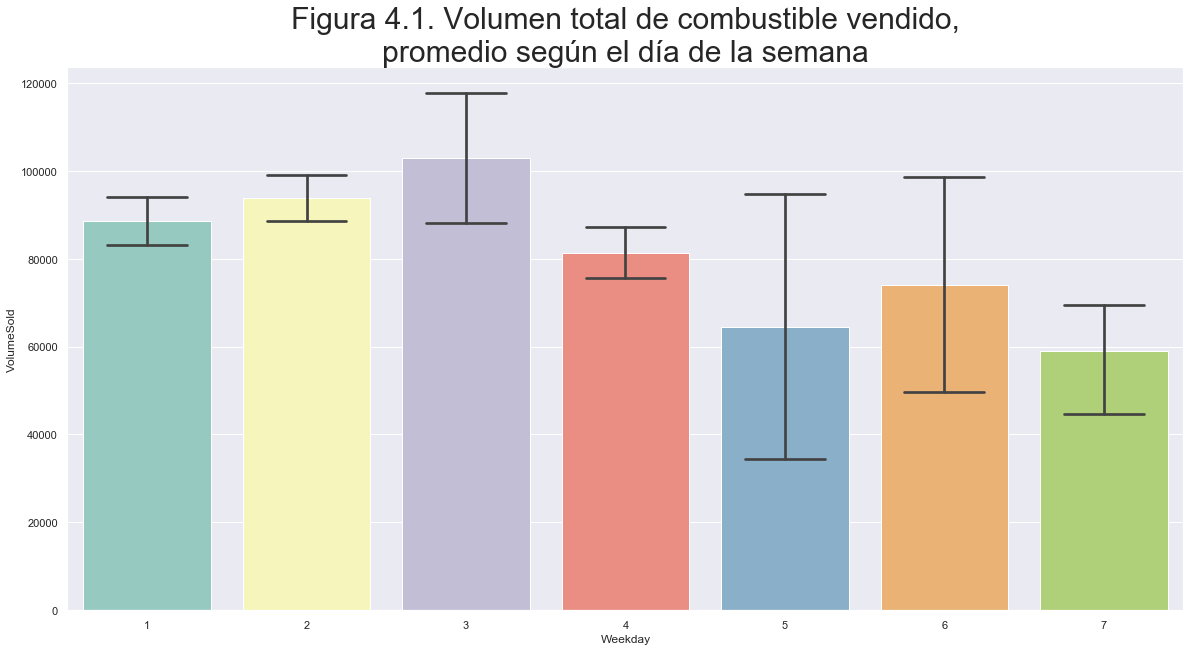

In [9]:
seaborn.set()
plt.subplots(figsize=(20,10))
#plt.ylim(12, 16)
plt.title('Figura 4.1. Volumen total de combustible vendido,'
          '\npromedio según el día de la semana', fontsize=30)
seaborn.barplot(x='Weekday', y='VolumeSold', data=df4, palette='Set3', capsize=0.5)

In [10]:
df4 = df.groupby(['SiteID', 'Date', 'Weekday'])[['VolumeSold']].aggregate(np.sum).reset_index()

Text(0.5, 1.03, 'Figura 4.2. Volumen de combustible vendido en cada estación,\npromedio según el día de la semana')

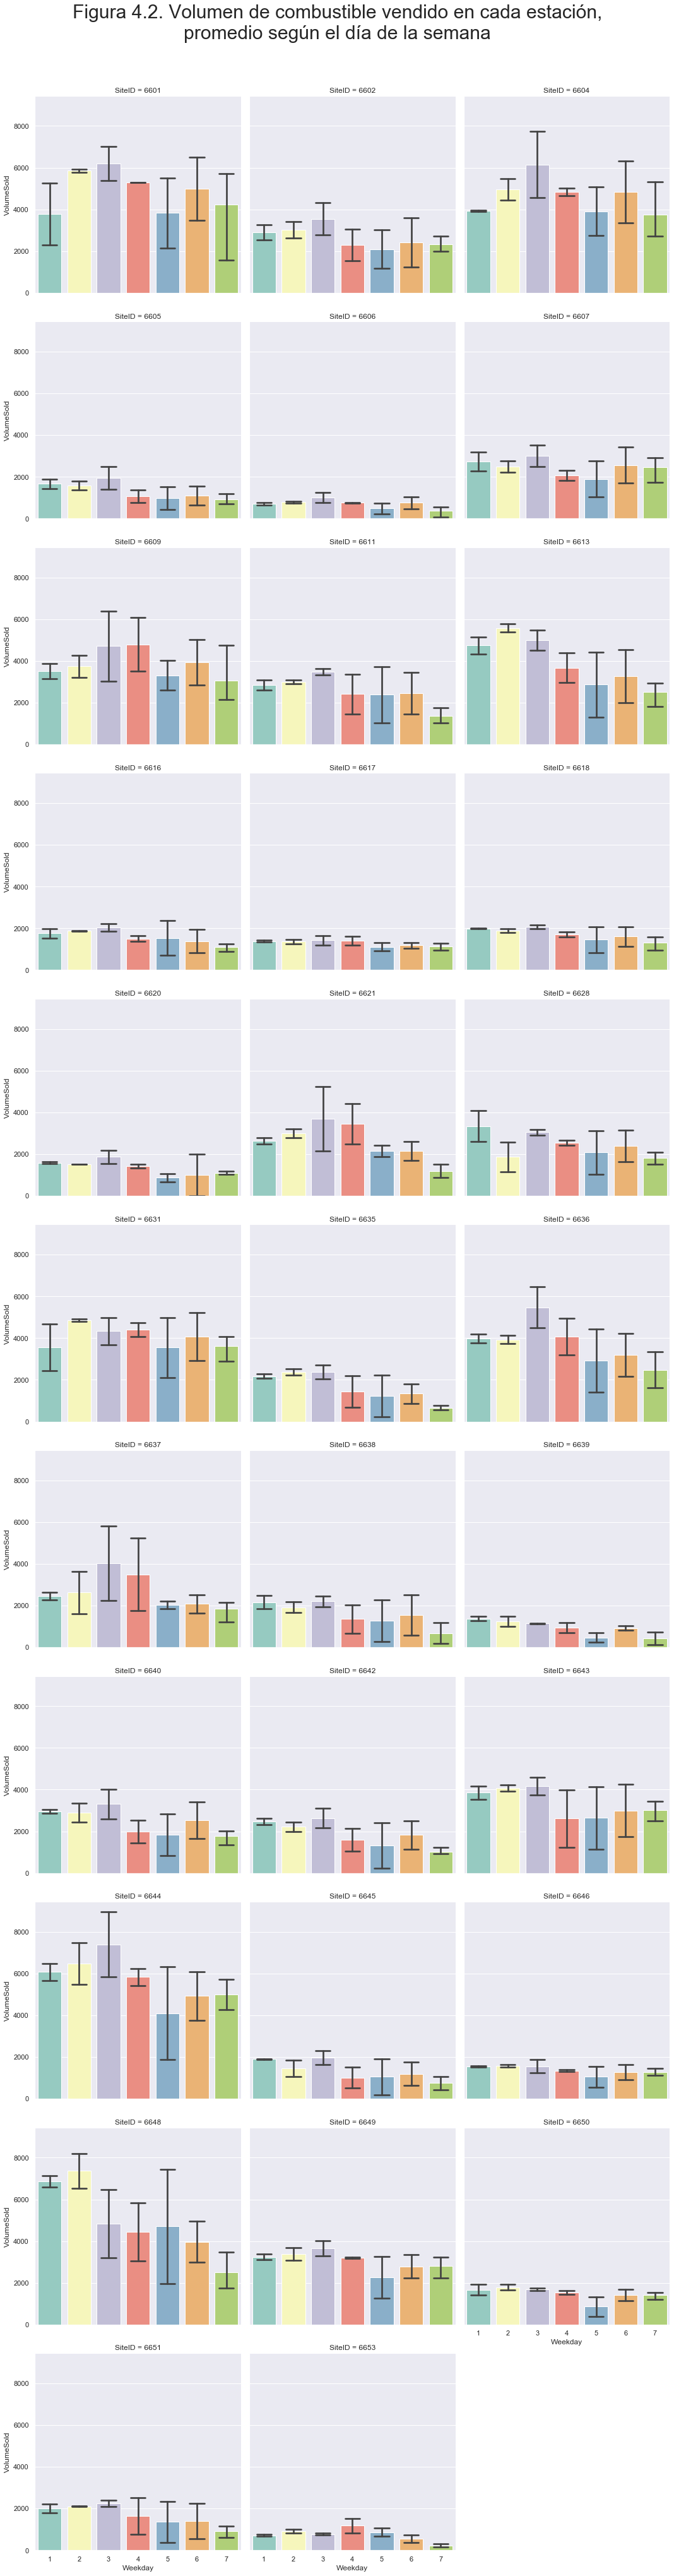

In [11]:
seaborn.set()
seaborn.catplot(x='Weekday', y='VolumeSold', col='SiteID', col_wrap=3, data=df4, palette='Set3', kind='bar', capsize=0.5).fig.suptitle('Figura 4.2. Volumen de combustible vendido en cada estación,'
          '\npromedio según el día de la semana', y=1.03, fontsize=30)

5. ¿En dónde se dan más casos de “Drive Off”? 
¿Son todos los casos normales?

In [12]:
df.describe()

,Weekday,Hour,SiteID,Pump,VolumeSold,UnitPrice,TotalSale
count,89542.000000,89542.000000,89542.000000,89542.000000,89542.000000,89542.000000,89542.000000
mean,4.024715,13.120480,6627.283677,4.912510,13.260180,2.820401,37.166818
std,2.059957,5.338424,16.902573,2.992429,10.952985,0.087581,30.709942
min,1.000000,0.000000,6601.000000,1.000000,2.200000,1.910000,5.960000
25%,2.000000,9.000000,6611.000000,2.000000,5.310000,2.750000,15.040000
50%,4.000000,13.000000,6631.000000,4.000000,10.160000,2.790000,28.480000
75%,6.000000,18.000000,6643.000000,7.000000,18.150000,2.890000,50.660000
max,7.000000,23.000000,6653.000000,12.000000,144.570000,3.090000,406.240000


In [13]:
df5 = df.groupby('PaymentType').get_group('DRIVE OFF')
df5.describe()

,Weekday,Hour,SiteID,Pump,VolumeSold,UnitPrice,TotalSale
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.000000,17.200000,6623.300000,7.100000,9.844000,2.809000,27.685000
std,1.414214,6.696599,19.009062,2.726414,2.168785,0.114159,6.439333
min,2.000000,4.000000,6601.000000,2.000000,7.670000,2.700000,21.700000
25%,4.250000,17.250000,6607.250000,5.500000,8.487500,2.722500,23.305000
50%,5.000000,20.000000,6617.500000,7.000000,9.040000,2.755000,24.760000
75%,6.000000,21.000000,6639.250000,9.250000,11.020000,2.887500,31.677500
max,7.000000,23.000000,6653.000000,11.000000,14.520000,3.040000,41.960000


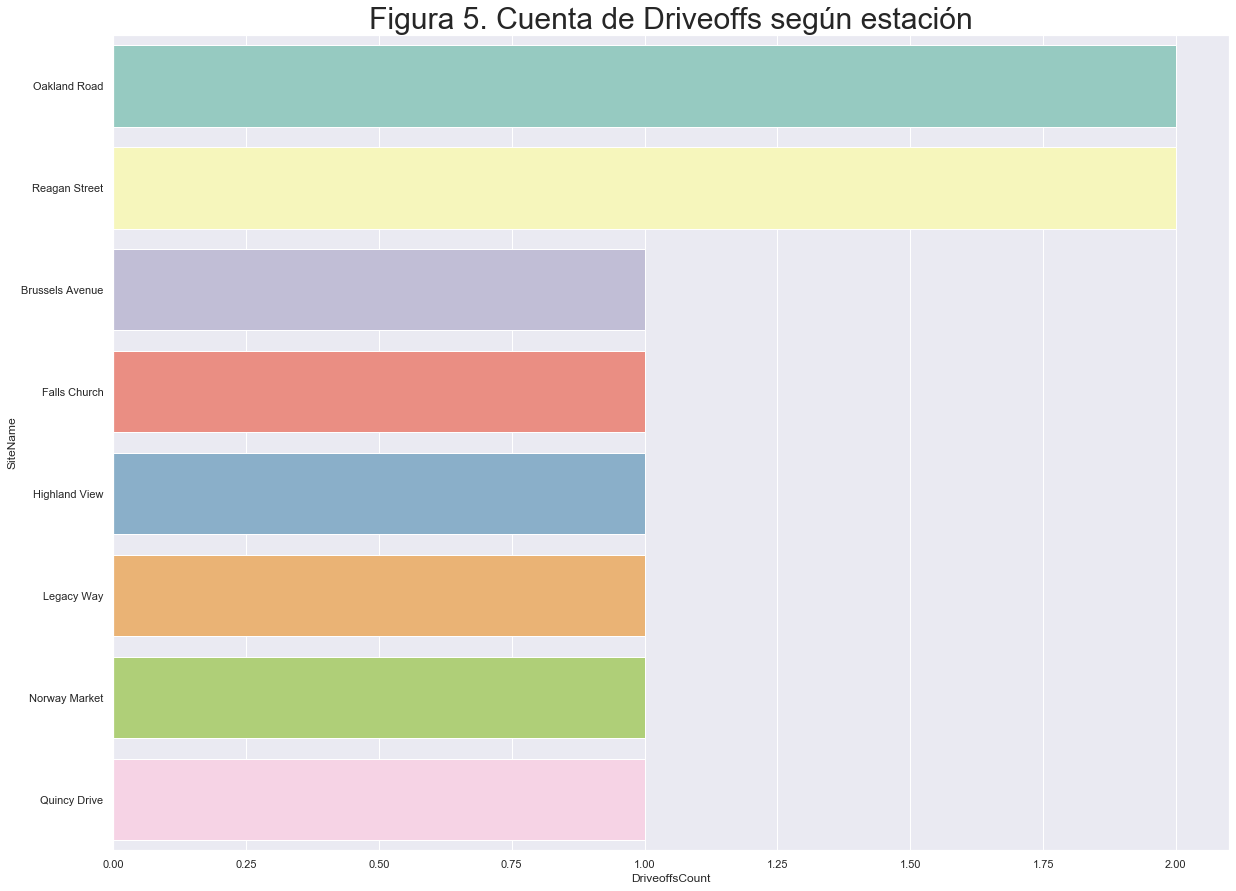

In [14]:
df5 = df5.groupby(['SiteName', 'PaymentType']).size().reset_index(name='DriveoffsCount').sort_values('DriveoffsCount', ascending=False)

seaborn.set()
plt.subplots(figsize=(20,15))
plt.title('Figura 5. Cuenta de Driveoffs según estación', fontsize=30)
seaborn.barplot(x='DriveoffsCount', y='SiteName', data=df5, palette='Set3')


Los driveoffs durante la primera semana de enero 2017 ocurrieron, en promedio, a las 5pm, mientras que, en promedio, las ventas globales ocurrieron a la 1pm. Además, los driveoffs incurrieron en gastos menores al de la venta promedio. 

6. ¿Hay algo más que pueda determinar sobre los datos?

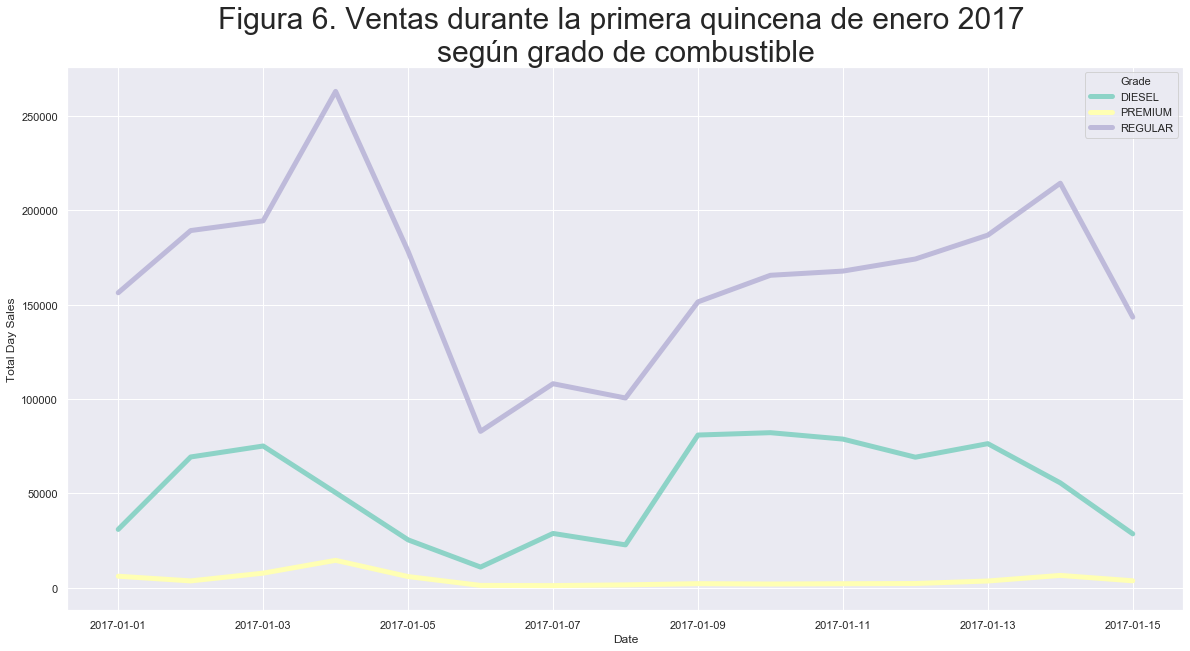

In [35]:
df6 = df.groupby(['Date', 'Grade'])['TotalSale'].sum().reset_index(name='Total Day Sales').sort_values('Date')

seaborn.set(rc={"lines.linewidth": 5})
plt.subplots(figsize=(20,10))
plt.title('Figura 6. Ventas durante la primera quincena de enero 2017 \nsegún grado de combustible', fontsize=30)
seaborn.lineplot(x='Date', y='Total Day Sales', hue='Grade', data=df6, palette='Set3')


Durante la quincena de estudio, las ventas de combustible premium se mantuvieron estables, lo cual es posible interpretar como una base de clientes leales. El diesel y regular presentan tendencias de subidas y bajas en las mismas fechas, lo cual puede indicar que sus consumidores son susceptibles a cambiar su comportamiento según circunstancias similares. 
